Perform clustering (hierarchical,K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters. 
Draw the inferences from the clusters obtained.

Data Description:
 
The file EastWestAirlinescontains information on passengers who belong to an airline’s frequent flier program. For each passenger the data include information on their mileage history and on different ways they accrued or spent miles in the last year. The goal is to try to identify clusters of passengers that have similar characteristics for the purpose of targeting different segments for different types of mileage offers

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import normalize
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
%matplotlib inline

In [2]:
al_data=pd.read_excel('EastWestAirlines.xlsx', sheet_name='data')
al_data.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [3]:
al_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [4]:
#removing NA value in dataset
al_data=al_data.dropna()
al_data.shape

(3999, 12)

In [5]:
al_data.duplicated().sum()

0

In [81]:
#renaming of column
al_data=al_data.rename({'ID#':'id','Award?':'award'},axis=1)
al_data.head()

,id,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [92]:
al_data.corr()

,id,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,award
id,1.000000,-0.243737,-0.019374,-0.224465,0.020291,-0.014707,-0.203012,-0.146915,-0.031013,-0.052096,-0.964988,-0.177901
Balance,-0.243737,1.000000,0.108722,0.338344,-0.008804,0.035243,0.403487,0.324935,0.217551,0.255700,0.263129,0.178494
Qual_miles,-0.019374,0.108722,1.000000,0.007931,-0.013923,-0.007779,0.031021,0.050725,0.126774,0.144004,0.017312,0.095256
cc1_miles,-0.224465,0.338344,0.007931,1.000000,-0.068223,0.060555,0.825200,0.608943,0.037370,0.041333,0.230849,0.335457
cc2_miles,0.020291,-0.008804,-0.013923,-0.068223,1.000000,-0.006166,-0.003969,0.064399,0.010598,0.028284,-0.005807,0.005332
cc3_miles,-0.014707,0.035243,-0.007779,0.060555,-0.006166,1.000000,0.204134,0.097313,-0.001777,-0.001117,0.010832,0.023484
Bonus_miles,-0.203012,0.403487,0.031021,0.825200,-0.003969,0.204134,1.000000,0.603180,0.183536,0.185261,0.210397,0.373506
Bonus_trans,-0.146915,0.324935,0.050725,0.608943,0.064399,0.097313,0.603180,1.000000,0.377216,0.432364,0.161262,0.333893
Flight_miles_12mo,-0.031013,0.217551,0.126774,0.037370,0.010598,-0.001777,0.183536,0.377216,1.000000,0.869193,0.037271,0.217715
Flight_trans_12,-0.052096,0.255700,0.144004,0.041333,0.028284,-0.001117,0.185261,0.432364,0.869193,1.000000,0.059260,0.247909


In [111]:
#Removing of features
data=al_data.copy()
data=data.drop(['id','Flight_miles_12mo','Bonus_miles'],axis=1)
data.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_trans,Flight_trans_12,Days_since_enroll,award
0,28143,0,1,1,1,1,0,7000,0
1,19244,0,1,1,1,2,0,6968,0
2,41354,0,1,1,1,4,0,7034,0
3,14776,0,1,1,1,1,0,6952,0
4,97752,0,4,1,1,26,4,6935,1


In [112]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Balance,3999.0,73601.327582,100775.664958,0.0,18527.5,43097.0,92404.0,1704838.0
Qual_miles,3999.0,144.114529,773.663804,0.0,0.0,0.0,0.0,11148.0
cc1_miles,3999.0,2.059515,1.376919,1.0,1.0,1.0,3.0,5.0
cc2_miles,3999.0,1.014504,0.147650,1.0,1.0,1.0,1.0,3.0
cc3_miles,3999.0,1.012253,0.195241,1.0,1.0,1.0,1.0,5.0
Bonus_trans,3999.0,11.601900,9.603810,0.0,3.0,12.0,17.0,86.0
Flight_trans_12,3999.0,1.373593,3.793172,0.0,0.0,0.0,1.0,53.0
Days_since_enroll,3999.0,4118.559390,2065.134540,2.0,2330.0,4096.0,5790.5,8296.0
award,3999.0,0.370343,0.482957,0.0,0.0,0.0,1.0,1.0


## Hierarchical clustering

In [115]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)
df_norm = norm_func(data)
df_norm

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_trans,Flight_trans_12,Days_since_enroll,award
0,0.016508,0.0,0.00,0.0,0.0,0.011628,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.023256,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.046512,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.011628,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.302326,0.075472,0.835905,1.0
...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.046512,0.018868,0.168917,1.0
3995,0.037766,0.0,0.00,0.0,0.0,0.058140,0.000000,0.167953,1.0
3996,0.043169,0.0,0.50,0.0,0.0,0.093023,0.000000,0.168797,1.0
3997,0.032202,0.0,0.00,0.0,0.0,0.011628,0.018868,0.168676,0.0


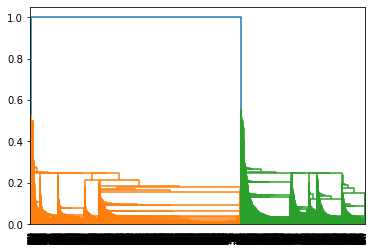

In [116]:
# create dendrogram of single linkge
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='single'))

In [140]:
# create clusters
k=[2,3,4,5,6]

for n in k:
    s_hc = AgglomerativeClustering(n_clusters=n, affinity = 'euclidean', linkage = 'single')
    y_hc_s = s_hc.fit_predict(df_norm)
    s_Clusters=pd.DataFrame(y_hc_s,columns=['s_Clusters'])
    print(f'For k = {n}','\n',s_Clusters['s_Clusters'].value_counts())
    # silhouette score
    sil_score= silhouette_score(df_norm, s_hc.labels_)
    print(f'For k silhouette score = {n}','\n', sil_score)

For k = 2 
 1    2518
0    1481
Name: s_Clusters, dtype: int64
For k silhouette score = 2 
 0.5418984390351201
For k = 3 
 0    2518
2    1480
1       1
Name: s_Clusters, dtype: int64
For k silhouette score = 3 
 0.5280216671289201
For k = 4 
 1    2516
0    1480
2       2
3       1
Name: s_Clusters, dtype: int64
For k silhouette score = 4 
 0.47466644081728626
For k = 5 
 1    2516
0    1479
2       2
4       1
3       1
Name: s_Clusters, dtype: int64
For k silhouette score = 5 
 0.3965138775555993
For k = 6 
 1    2516
0    1473
5       6
2       2
4       1
3       1
Name: s_Clusters, dtype: int64
For k silhouette score = 6 
 0.39748823166771163


### By showing dendrogram and silhouette score single linkage gives best result at k=2

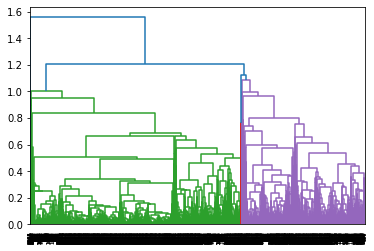

In [117]:
# create dendrogram of average linkge
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='average'))

In [137]:
k=[2,3,4,5,6]

for n in k:
    a_hc = AgglomerativeClustering(n_clusters=n, affinity = 'euclidean', linkage = 'average')
    y_hc_a = a_hc.fit_predict(df_norm)
    a_Clusters=pd.DataFrame(y_hc_a,columns=['a_Clusters'])
    print(f'For k = {n}','\n',a_Clusters['a_Clusters'].value_counts())
    # silhouette score
    sil_score= silhouette_score(df_norm, a_hc.labels_)
    print(f'For k silhouette score = {n}','\n', sil_score)

For k = 2 
 0    3997
1       2
Name: a_Clusters, dtype: int64
For k silhouette score = 2 
 0.43987069055555095
For k = 3 
 2    2518
0    1479
1       2
Name: a_Clusters, dtype: int64
For k silhouette score = 3 
 0.5387533032421453
For k = 4 
 2    2518
0    1472
1       7
3       2
Name: a_Clusters, dtype: int64
For k silhouette score = 4 
 0.5122438097456371
For k = 5 
 0    2518
2    1470
1       7
4       2
3       2
Name: a_Clusters, dtype: int64
For k silhouette score = 5 
 0.4906184380121328
For k = 6 
 2    2511
0    1470
1       7
5       7
4       2
3       2
Name: a_Clusters, dtype: int64
For k silhouette score = 6 
 0.4360200046269589


### By showing dendrogram and silhouette score average linkage gives best result at k=3

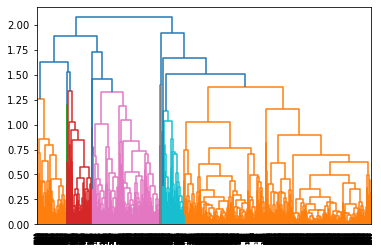

In [118]:
# create dendrogram of complete linkge
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='complete'))

In [138]:
k=[2,3,4,5,6]

for n in k:
    cp_hc = AgglomerativeClustering(n_clusters=n, affinity = 'euclidean', linkage = 'complete')
    y_hc_cp = cp_hc.fit_predict(df_norm)
    cp_Clusters=pd.DataFrame(y_hc_cp,columns=['cp_Clusters'])
    print(f'For k = {n}','\n',cp_Clusters['cp_Clusters'].value_counts())
    # silhouette score
    sil_score= silhouette_score(df_norm, cp_hc.labels_)
    print(f'For k silhouette score = {n}','\n', sil_score)

For k = 2 
 0    2524
1    1475
Name: cp_Clusters, dtype: int64
For k silhouette score = 2 
 0.5404674023689944
For k = 3 
 1    2493
0    1475
2      31
Name: cp_Clusters, dtype: int64
For k silhouette score = 3 
 0.4821909949152348
For k = 4 
 1    2493
0     815
3     660
2      31
Name: cp_Clusters, dtype: int64
For k silhouette score = 4 
 0.4367117849884221
For k = 5 
 0    2493
3     813
1     660
2      31
4       2
Name: cp_Clusters, dtype: int64
For k silhouette score = 5 
 0.4363551831198449
For k = 6 
 1    2491
3     813
0     660
2      31
5       2
4       2
Name: cp_Clusters, dtype: int64
For k silhouette score = 6 
 0.434785599622342


### By showing dendrogram and silhouette score complete linkage gives best result at k=2

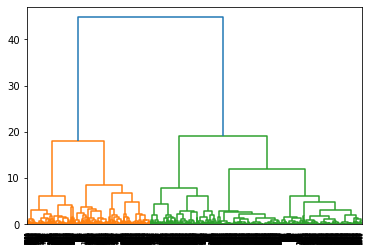

In [133]:
# create dendrogram of centroid linkge
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='ward'))

In [139]:
k=[2,3,4,5,6]

for n in k:
    w_hc = AgglomerativeClustering(n_clusters=n, affinity = 'euclidean', linkage = 'ward')
    y_hc_w = w_hc.fit_predict(df_norm)
    w_Clusters=pd.DataFrame(y_hc_w,columns=['w_Clusters'])
    print(f'For k = {n}','\n',w_Clusters['w_Clusters'].value_counts())
    # silhouette score
    sil_score= silhouette_score(df_norm, w_hc.labels_)
    print(f'For k silhouette score = {n}','\n', sil_score)

For k = 2 
 0    2518
1    1481
Name: w_Clusters, dtype: int64
For k silhouette score = 2 
 0.5418984390351201
For k = 3 
 1    1719
0    1481
2     799
Name: w_Clusters, dtype: int64
For k silhouette score = 3 
 0.4433544061486074
For k = 4 
 0    1719
1     915
2     799
3     566
Name: w_Clusters, dtype: int64
For k silhouette score = 4 
 0.43599434096356177
For k = 5 
 1    964
0    915
2    799
4    755
3    566
Name: w_Clusters, dtype: int64
For k silhouette score = 5 
 0.4004975685099093
For k = 6 
 1    964
0    799
4    755
3    566
2    499
5    416
Name: w_Clusters, dtype: int64
For k silhouette score = 6 
 0.35895237218148673


### By showing dendrogram and silhouette score ward linkage gives best result at k=2
### comparing dendrogram and silhouette score, ward linkage gives best clustring at k=2

In [150]:
hc = AgglomerativeClustering(n_clusters=2, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(df_norm)
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])

In [157]:
data1=al_data.copy()
data1['h_clusters']=Clusters
data1.sort_values('h_clusters')

,id,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,award,h_clusters
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
2494,2513,142152,0,3,1,1,19464,13,0,0,3088,0,0
2495,2514,12713,0,1,1,1,0,0,0,0,3077,0,0
2496,2515,28848,0,1,1,1,0,0,0,0,3069,0,0
2497,2516,10940,0,1,1,1,0,0,0,0,3062,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2573,2592,104632,0,1,1,1,26700,10,1200,7,2791,1,1
2570,2589,10307,0,1,1,1,0,0,0,0,2808,1,1
1042,1053,98213,0,5,1,1,68013,29,0,0,5755,1,1
2567,2586,6345,0,2,1,1,7719,18,0,0,2805,1,1


In [158]:
data1.groupby('h_clusters').agg(['mean'])

,id,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,award
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
h_clusters,,,,,,,,,,,,
0,2173.169182,59807.839555,87.602462,1.705322,1.01390,1.008737,10227.689039,9.142971,226.292295,0.652502,3820.652105,0.0
1,1745.592843,97053.051317,240.196489,2.661715,1.01553,1.018231,28905.414585,15.782579,857.501013,2.599595,4625.062120,1.0


#### Here cluster with row_index 1 are thoes passenger who make more transaction and  gating award 

## K-mean clustering

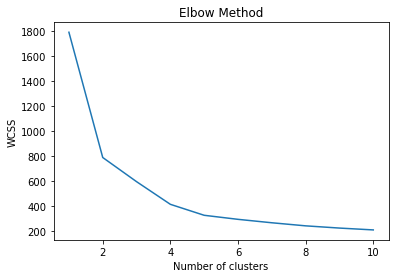

In [165]:
#finding k value by elbow plot
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(df_norm)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [167]:
c2 = KMeans(2, random_state=0)
c2.fit(df_norm)
c2.labels_

array([1, 1, 1, ..., 0, 1, 1])

In [183]:
k=[2,3,4,5,6]

for n in k:
    c2 = KMeans(n)
    c2.fit(df_norm)
    c2.labels_
    # silhouette score
    sil_score= silhouette_score(df_norm, c2.labels_)
    print(f'For k silhouette score = {n}','\n', sil_score)
    
    

For k silhouette score = 2 
 0.5418984390351201
For k silhouette score = 3 
 0.4703635151617524
For k silhouette score = 4 
 0.4790048132501296
For k silhouette score = 5 
 0.4509941269225428
For k silhouette score = 6 
 0.4145545517302181


#### By Elbow plot and silhouette score k-mean cluster gives best result at k=2 

In [185]:
#Build Cluster algorithm
clusters_new = KMeans(2, random_state=0)
clusters_new.fit(df_norm)
clusters_new.labels_

array([1, 1, 1, ..., 0, 1, 1])

In [189]:
#Assign clusters to the data set
data_k=al_data.copy()
data_k['clusterid_new'] = clusters_new.labels_
data_k.sort_values('clusterid_new')

,id,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,award,clusterid_new
1999,2016,327126,1452,5,1,1,97997,25,350,3,4440,1,0
3165,3187,194816,0,1,1,1,20822,25,6647,12,2424,1,0
1513,1528,124775,1704,1,1,1,11564,8,700,2,4847,1,0
1512,1527,4779,0,1,1,1,600,2,0,0,4926,1,0
3167,3189,17863,0,1,1,1,0,0,0,0,2028,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1764,1780,70518,0,1,1,1,2000,3,1000,2,4450,0,1
1768,1784,99336,0,3,1,1,14195,14,500,1,4453,0,1
1769,1785,67612,0,1,1,1,0,0,0,0,4442,0,1
1771,1787,72812,0,3,1,1,16930,17,50,1,4442,0,1


In [209]:
data_k.groupby('clusterid_new').agg(['mean'])

,id,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,award
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
clusterid_new,,,,,,,,,,,,
0,1745.592843,97053.051317,240.196489,2.661715,1.01553,1.018231,28905.414585,15.782579,857.501013,2.599595,4625.062120,1.0
1,2173.169182,59807.839555,87.602462,1.705322,1.01390,1.008737,10227.689039,9.142971,226.292295,0.652502,3820.652105,0.0


## DBSCAN Clustering

In [211]:
EPS = [0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.8]

for n in EPS:
    dbscan = DBSCAN(eps=n, min_samples=12)
    dbscan.fit(df_norm)
    y=pd.DataFrame(dbscan.fit_predict(df_norm),columns=['clusterid_DBSCAN'])
    print(f'For eps = {n}','\n',y['clusterid_DBSCAN'].value_counts())
    # silhouette score
    sil_score= silhouette_score(df_norm, dbscan.labels_)
    print(f'For eps silhouette score = {n}','\n', sil_score)

For eps = 0.4 
  0    2485
 1    1450
-1      16
 4      16
 2      11
 3       9
 5       6
 6       6
Name: clusterid_DBSCAN, dtype: int64
For eps silhouette score = 0.4 
 0.2520338466490121
For eps = 0.45 
  0    2490
 1    1451
 4      16
 2      11
-1      10
 3       9
 6       6
 5       6
Name: clusterid_DBSCAN, dtype: int64
For eps silhouette score = 0.45 
 0.25122095242018777
For eps = 0.5 
  0    2490
 1    1455
 6      16
 3      11
 4       9
-1       6
 2       6
 5       6
Name: clusterid_DBSCAN, dtype: int64
For eps silhouette score = 0.5 
 0.250604155877368
For eps = 0.55 
  0    2517
 1    1480
-1       2
Name: clusterid_DBSCAN, dtype: int64
For eps silhouette score = 0.55 
 0.5410254351417803
For eps = 0.6 
  0    2517
 1    1481
-1       1
Name: clusterid_DBSCAN, dtype: int64
For eps silhouette score = 0.6 
 0.5176686811448368
For eps = 0.65 
  0    2517
 1    1481
-1       1
Name: clusterid_DBSCAN, dtype: int64
For eps silhouette score = 0.65 
 0.5176686811448368
F

#### By observing silhouette score we get best value at esp=0.8 with min_sample=12

In [201]:
#dbscan = DBSCAN(eps=0.8, min_samples=12)
dbscan = DBSCAN(eps=0.8, min_samples=12)
dbscan.fit(df_norm)
dbscan.labels_

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [202]:
#Assign clusters to the data set
data_d=al_data.copy()
data_d['clusterid_new'] = dbscan.labels_
data_d.sort_values('clusterid_new')

,id,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,award,clusterid_new
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
2494,2513,142152,0,3,1,1,19464,13,0,0,3088,0,0
2495,2514,12713,0,1,1,1,0,0,0,0,3077,0,0
2496,2515,28848,0,1,1,1,0,0,0,0,3069,0,0
2497,2516,10940,0,1,1,1,0,0,0,0,3062,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2573,2592,104632,0,1,1,1,26700,10,1200,7,2791,1,1
2570,2589,10307,0,1,1,1,0,0,0,0,2808,1,1
1042,1053,98213,0,5,1,1,68013,29,0,0,5755,1,1
2567,2586,6345,0,2,1,1,7719,18,0,0,2805,1,1


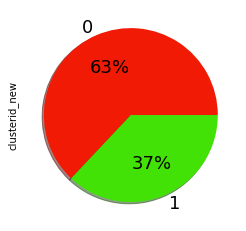

In [208]:
data_d['clusterid_new'].value_counts().plot(kind='pie', autopct='%2.0f%%', fontsize='18', 
                                        colors = ['#F11A05','#43E206'], shadow =True)
plt.show()

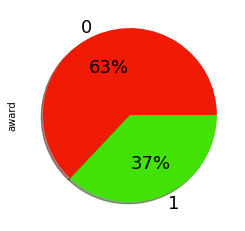

In [210]:
data_d['award'].value_counts().plot(kind='pie', autopct='%2.0f%%', fontsize='18', 
                                        colors = ['#F11A05','#43E206'], shadow =True)
plt.show()

In [205]:
data_d.groupby('clusterid_new').agg(['mean'])

,id,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,award
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
clusterid_new,,,,,,,,,,,,
0,2173.169182,59807.839555,87.602462,1.705322,1.01390,1.008737,10227.689039,9.142971,226.292295,0.652502,3820.652105,0.0
1,1745.592843,97053.051317,240.196489,2.661715,1.01553,1.018231,28905.414585,15.782579,857.501013,2.599595,4625.062120,1.0


### Conclusion
###  when we implement Hierarchical,K means and DBSCAN clustering we show that all clustering method give best cluster value at k=2  and mean of all features of all clustering are same
### By observation of pair plot for award and clustered data we can say that the passenger who get award are in one group and who don't get award are in second group